In [43]:
import os
import random
import glob 
from PIL import Image, ImageEnhance
from pathlib import Path
import numpy as np
os.getcwd()

'/Users/siva/Downloads/animals10_dataset'

### Data Preparation

In [51]:
dataset_folder = '/Users/siva/Downloads/animals2_dataset/raw-img/'
categories = Path(dataset_folder).glob('[a-z]*')
list(categories)

[PosixPath('/Users/siva/Downloads/animals2_dataset/raw-img/cat'),
 PosixPath('/Users/siva/Downloads/animals2_dataset/raw-img/dog')]

In [78]:
dataset_folder = '/Users/siva/Downloads/animals2_dataset/raw-img/'
categories = Path(dataset_folder).glob('[a-z]*')

animal_names = []
animals_array = []
animals_array_bw = []

for category in categories:
    files = Path(category).glob('*')
    animal_array = []
    animal_array_bw = []
    
    for file in files:
        im = Image.open(file).resize((128,128))
        im_bw = im.convert('L')
        animal_array.append(np.asarray(im))
        animal_array_bw.append(np.asarray(im_bw))

    animals_array.append(animal_array)
    animals_array_bw.append(animal_array_bw)

    animal_names.append(str(category).split('/')[-1])

In [79]:
len(animals_array_bw[0]), len(animals_array_bw[1])

(1668, 4863)

#### <center> Color Images - Commented </center>

animal_array_dim50 = []
animal_array_dim70 = []
animal_array_dim30 = []
animals_array_dim50 = []
animals_array_dim70 = []
animals_array_dim30 = []

for animal in animals_array:

    animal_array_dim50 = []
    animal_array_dim70 = []
    animal_array_dim30 = []

    for image in animal:
        im_org = Image.fromarray(image)
        enhancer = ImageEnhance.Brightness(im_org)

        im_dim30 = enhancer.enhance(0.3)
        im_dim50 = enhancer.enhance(0.5)
        im_dim70 = enhancer.enhance(0.7)

        animal_array_dim30.append(np.asarray(im_dim30))
        animal_array_dim50.append(np.asarray(im_dim50))
        animal_array_dim70.append(np.asarray(im_dim70))

    animals_array_dim30.append(animal_array_dim30)
    animals_array_dim50.append(animal_array_dim50)
    animals_array_dim50.append(animal_array_dim70)

In [82]:
animals_array_bw_dim50 = []
animals_array_bw_dim70 = []
animals_array_bw_dim30 = []

for animal in animals_array_bw:

    animal_array_bw_dim50 = []
    animal_array_bw_dim70 = []
    animal_array_bw_dim30 = []
    
    for image in animal:
        im_org = Image.fromarray(image)
        enhancer = ImageEnhance.Brightness(im_org)

        im_dim30 = enhancer.enhance(0.3)
        im_dim50 = enhancer.enhance(0.5)
        im_dim70 = enhancer.enhance(0.7)

        animal_array_bw_dim30.append(np.asarray(im_dim30))
        animal_array_bw_dim50.append(np.asarray(im_dim50))
        animal_array_bw_dim70.append(np.asarray(im_dim70))

    animals_array_bw_dim30.append(animal_array_bw_dim30)
    animals_array_bw_dim50.append(animal_array_bw_dim50)
    animals_array_bw_dim70.append(animal_array_bw_dim70)

In [83]:
animals_dict_bw = {}
animals_dict_bw_dim30 = {}
animals_dict_bw_dim50 = {}
animals_dict_bw_dim70 = {}

for i in range(len(animal_names)):
    animals_dict_bw[animal_names[i]] = animals_array_bw[i]
    animals_dict_bw_dim30[animal_names[i]] = animals_array_bw_dim30[i]
    animals_dict_bw_dim50[animal_names[i]] = animals_array_bw_dim50[i]
    animals_dict_bw_dim70[animal_names[i]] = animals_array_bw_dim70[i]

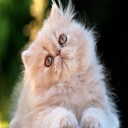

In [223]:
Image.fromarray(animals_array[0][0])

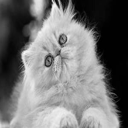

In [224]:
Image.fromarray(animals_array_bw[0][0])

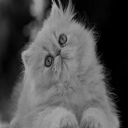

In [225]:
Image.fromarray(animals_array_bw_dim70[0][0])

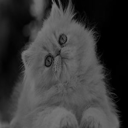

In [226]:
Image.fromarray(animals_array_bw_dim50[0][0])

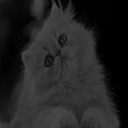

In [227]:
Image.fromarray(animals_array_bw_dim30[0][0])

### Dataloader

In [174]:
# Create an ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

# Use the flow method of the ImageDataGenerator to generate batches of images and labels
batch_size = 32
image_size = (128, 128)

def generator_from_dict(image_dict, datagen, batch_size, image_size):
    while True:
        # Initialize empty arrays for the batch of images and labels
        batch_images = np.zeros((batch_size,) + image_size, dtype=np.float32)
        batch_labels = np.zeros((batch_size, len(image_dict)), dtype=np.float32)

        # Randomly select batch_size number of labels
        labels = np.random.choice(list( image_dict.keys() ), size=batch_size)

        # Load the images and labels for the selected labels
        for i, label in enumerate(labels):
            # Select a random image from the array of images for the label
            index = np.random.randint(0, len(image_dict[label]))
            image = image_dict[label][index]

            # Apply the preprocessing options to the image
            image = datagen.apply_transform(image, datagen.get_random_transform(image.shape))

            # Add the image and label to the batch
            batch_images[i] = image
            batch_labels[i][list(image_dict.keys()).index(label)] = 1

        yield batch_images, batch_labels

### Model Building

In [198]:
import tensorflow as tf
from keras.layers import *
from tensorflow.keras.models import Sequential, Model

img_input = Input(shape=(128,128, 1))
img_conc = Concatenate()([img_input, img_input, img_input])

In [181]:
vgg = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor = img_conc,
    pooling='max',
    classes=2,
)

58900480/58889256 [==============================] - 29s 0us/step


In [193]:
vgg.summary()

Model: "vgg16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 128, 128, 3)  0           ['input_4[0][0]',                
                                                                  'input_4[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['concatenate_2[0][0]']      

In [199]:
last_output = vgg.output
x = Dense(128,activation="relu")(last_output)
x = Dense(512,activation="relu")(x)
outputs = Dense(2,activation="softmax")(x)

# Add dense layers to the model 
vgg = Model(inputs=vgg.inputs,outputs=outputs)

In [200]:
vgg.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 128, 128, 1  0           []                               
                                )]                                                                
                                                                                                  
 concatenate_2 (Concatenate)    (None, 128, 128, 3)  0           ['input_4[0][0]',                
                                                                  'input_4[0][0]',                
                                                                  'input_4[0][0]']                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 128, 128, 64  1792        ['concatenate_2[0][0]']      

In [202]:
from tensorflow.keras.optimizers import Adam

vgg.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

In [205]:
# Use the generator to train your model
vgg.fit( generator_from_dict(animals_dict_bw, datagen, batch_size, image_size), epochs=3, steps_per_epoch=50 )

Epoch 1/3
50/50 [==============================] - 247s 5s/step - loss: 0.6161 - accuracy: 0.6550
Epoch 2/3
50/50 [==============================] - 250s 5s/step - loss: 0.5209 - accuracy: 0.7362
Epoch 3/3
50/50 [==============================] - 247s 5s/step - loss: 0.4127 - accuracy: 0.8144


In [206]:
vgg.fit( generator_from_dict(animals_dict_bw_dim70, datagen, batch_size, image_size), epochs=3, steps_per_epoch=50 )
vgg.fit( generator_from_dict(animals_dict_bw_dim50, datagen, batch_size, image_size), epochs=3, steps_per_epoch=50 )
vgg.fit( generator_from_dict(animals_dict_bw_dim30, datagen, batch_size, image_size), epochs=3, steps_per_epoch=50 )

Epoch 1/3
50/50 [==============================] - 259s 5s/step - loss: 0.3676 - accuracy: 0.8350
Epoch 2/3
50/50 [==============================] - 283s 6s/step - loss: 0.3254 - accuracy: 0.8600
Epoch 3/3
50/50 [==============================] - 254s 5s/step - loss: 0.2323 - accuracy: 0.9013
Epoch 1/3
50/50 [==============================] - 263s 5s/step - loss: 0.2148 - accuracy: 0.9237
Epoch 2/3
50/50 [==============================] - 277s 6s/step - loss: 0.2263 - accuracy: 0.9100
Epoch 3/3
50/50 [==============================] - 269s 5s/step - loss: 0.1762 - accuracy: 0.9344
Epoch 1/3
50/50 [==============================] - 254s 5s/step - loss: 0.1482 - accuracy: 0.9431
Epoch 2/3
50/50 [==============================] - 252s 5s/step - loss: 0.1252 - accuracy: 0.9575
Epoch 3/3
50/50 [==============================] - 255s 5s/step - loss: 0.0952 - accuracy: 0.9669


In [216]:
animals_dict_bw_dim30_cropped = {}
animals_dict_bw_dim30_cropped['cat'] = animals_dict_bw_dim30['cat'][:100]
animals_dict_bw_dim30_cropped['dog'] = animals_dict_bw_dim30['dog'][:100]

In [235]:
try:
    asd = vgg.evaluate( generator_from_dict(animals_dict_bw_dim30_cropped, datagen, batch_size, image_size) )

except (KeyboardInterrupt, SystemExit):
    print('\n Received keyboard interrupt, quitting threads.')

      3/Unknown - 4s 1s/step - loss: 0.1031 - accuracy: 0.9583
 Received keyboard interrupt, quitting threads.


In [229]:
vgg_od = tf.keras.applications.vgg16.VGG16(
    include_top=False,
    weights='imagenet',
    input_tensor = img_conc,
    pooling='max',
    classes=2,
)

last_output_od = vgg_od.output
x = Dense(128,activation="relu")(last_output)
x = Dense(512,activation="relu")(x)
outputs_od = Dense(2,activation="softmax")(x)

# Add dense layers to the model 
vgg_od = Model(inputs=vgg_od.inputs,outputs=outputs_od)

vgg_od.compile(optimizer=Adam(learning_rate=0.0001),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])


In [230]:
vgg_od.fit( generator_from_dict(animals_dict_bw_dim30, datagen, batch_size, image_size), epochs=3, steps_per_epoch=50 )

Epoch 1/3
50/50 [==============================] - 272s 5s/step - loss: 0.7917 - accuracy: 0.5487
Epoch 2/3
50/50 [==============================] - 291s 6s/step - loss: 0.6014 - accuracy: 0.6637
Epoch 3/3
50/50 [==============================] - 289s 6s/step - loss: 0.4994 - accuracy: 0.7487


In [236]:
try:
    asd_od = vgg_od.evaluate( generator_from_dict(animals_dict_bw_dim30_cropped, datagen, batch_size, image_size) )

except (KeyboardInterrupt, SystemExit):
    print('\n Received keyboard interrupt, quitting threads.')

      4/Unknown - 5s 1s/step - loss: 0.4343 - accuracy: 0.7656
 Received keyboard interrupt, quitting threads.
